<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n20.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,72.376547,42.507853,0.001908,124.886308,124.902983,-0.016675
1,0.0,1.0,96.429639,84.333614,-0.032910,190.730343,190.769044,-0.038701
2,0.0,2.0,64.285720,23.575557,0.105827,97.967104,97.885785,0.081319
3,0.0,3.0,49.878709,75.811962,-0.037844,135.652827,135.697079,-0.044251
4,0.0,4.0,34.498407,68.307214,0.055191,112.860812,112.813796,0.047017
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,62.057565,79.007044,-0.039021,151.025587,151.054503,-0.028916
19996,999.0,16.0,60.361742,68.522692,-0.041719,138.842715,138.876909,-0.034194
19997,999.0,17.0,64.396767,92.886966,0.022269,167.306002,167.270220,0.035782
19998,999.0,18.0,49.607532,43.542459,0.026666,103.176657,103.148068,0.028589


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    72.376547  42.507853  0.001908  124.886308  124.902983 -0.016675
      1.0    96.429639  84.333614 -0.032910  190.730343  190.769044 -0.038701
      2.0    64.285720  23.575557  0.105827   97.967104   97.885785  0.081319
      3.0    49.878709  75.811962 -0.037844  135.652827  135.697079 -0.044251
      4.0    34.498407  68.307214  0.055191  112.860812  112.813796  0.047017
...                ...        ...       ...         ...         ...       ...
999.0 15.0   62.057565  79.007044 -0.039021  151.025587  151.054503 -0.028916
      16.0   60.361742  68.522692 -0.041719  138.842715  138.876909 -0.034194
      17.0   64.396767  92.886966  0.022269  167.306002  167.270220  0.035782
      18.0   49.607532  43.542459  0.026666  103.176657  103.148068  0.028589
      19.0   73.010280  65.653431  0.026057  148.689769  148.657956  0.031812

[20000 rows x 6 columns]

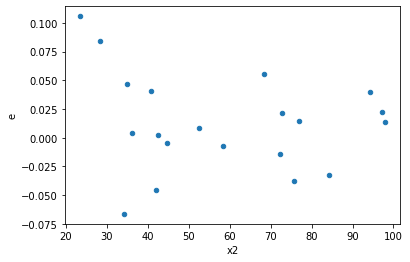

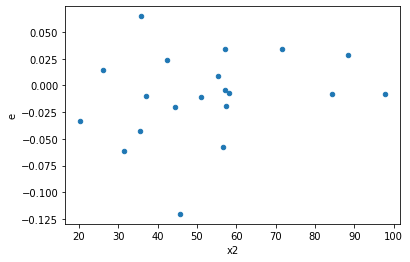

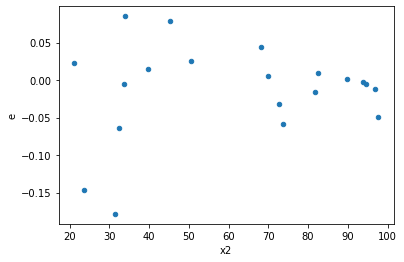

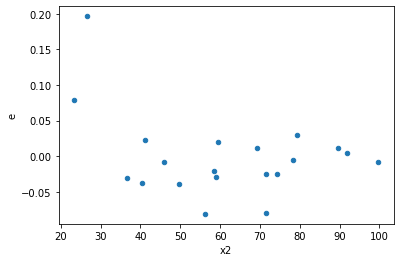

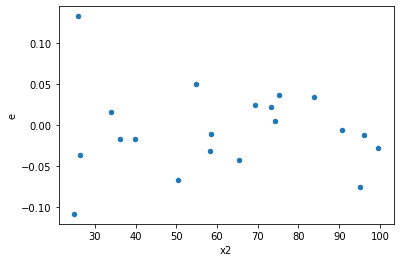

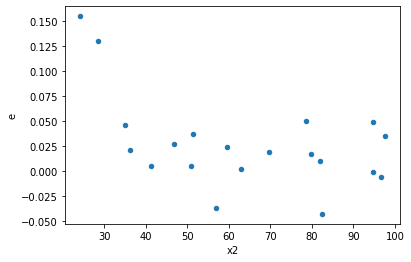

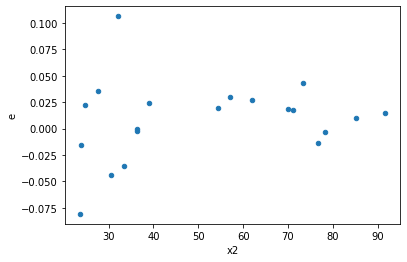

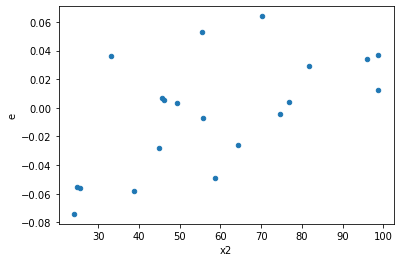

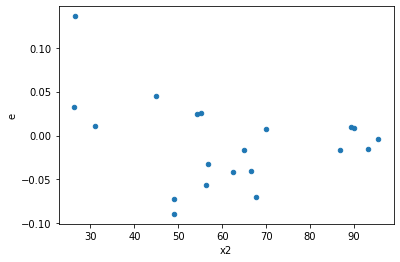

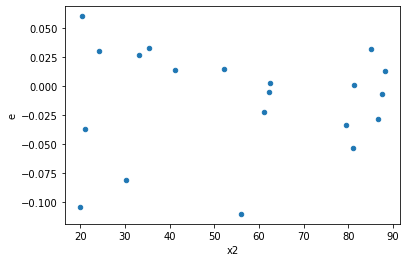

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,6.0,6.0,0.0032948120889448942,0.00668516592528601,0.0005491353481574824,0.0011141943208810017,2.028997631675807,0.4103434076674892,0.7948282961662554,0.2051717038337446,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.0026180998099930154,0.0036214243353484103,0.0004363499683321692,0.0006035707225580684,1.3832262320656414,0.7036542914398924,0.6481728542800538,0.3518271457199462,Reject001=1 : Homoscedasticity
10.0,6.0,6.0,0.005203148058960131,0.005773392755476204,0.0008671913431600219,0.0009622321259127007,1.1095960926066821,0.902766584756157,0.5486167076219215,0.4513832923780785,Reject001=1 : Homoscedasticity
21.0,6.0,6.0,0.0014311238677687846,0.008859622038768344,0.00023852064462813078,0.0014766036731280574,6.190674502956248,0.0431953475445459,0.978402326227727,0.02159767377227295,Reject001=1 : Homoscedasticity
25.0,6.0,6.0,0.004767223062220174,0.0048967279308974425,0.0007945371770366956,0.0008161213218162404,1.027165682617955,0.9748764703398041,0.512561764830098,0.48743823516990203,Reject001=1 : Homoscedasticity
30.0,6.0,6.0,0.0048529152304392755,0.01464579621731253,0.0008088192050732125,0.002440966036218755,3.0179377800478964,0.20468397409365946,0.8976580129531703,0.10234198704682973,Reject001=1 : Homoscedasticity
35.0,6.0,6.0,0.007017044663468627,0.015052768215050557,0.001169507443911438,0.002508794702508426,2.1451720684373914,0.37524161097378683,0.8123791945131066,0.18762080548689342,Reject001=1 : Homoscedasticity
39.0,6.0,6.0,0.004482769569853271,0.005219189755582523,0.0007471282616422118,0.0008698649592637537,1.1642779478743888,0.858225189295923,0.5708874053520385,0.4291125946479615,Reject001=1 : Homoscedasticity
42.0,6.0,6.0,0.006546253950527345,0.011193884125834835,0.0010910423250878908,0.0018656473543058058,1.7099679007920388,0.5307941769728601,0.7346029115135699,0.26539708848643007,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.018119267502323625,0.006562995100780067,0.0030198779170539374,0.0010938325167966778,0.36221083992156,0.24197965720146267,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.007801921224091679,0.004534345030759855,0.00130032020401528,0.0007557241717933092,0.5811831343231431,0.526098577896285,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.049079154403962155,0.0015970736092076052,0.008179859067327025,0.0002661789348679342,0.03254077272934176,0.0005968044467279379,Reject001=0 : Heteroscedasticity
3.0,6.0,6.0,0.03588910727675109,0.007041258241999964,0.005981517879458515,0.0011735430403333274,0.1961948562192652,0.06795849785948542,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.03331443073307044,0.011949346479970447,0.005552405122178406,0.0019915577466617413,0.3586837960916624,0.2376430220367935,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,0.0032948120889448942,0.00668516592528601,0.0005491353481574824,0.0011141943208810017,2.028997631675807,0.4103434076674892,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.012016091940996062,0.002407650119961079,0.0020026819901660105,0.0004012750199935132,0.20036881639917772,0.07128436558703792,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.0026180998099930154,0.0036214243353484103,0.0004363499683321692,0.0006035707225580684,1.3832262320656414,0.7036542914398924,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.016819959677516753,0.002122109557771153,0.0028033266129194588,0.0003536849262951922,0.12616615012506704,0.023608217811497783,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      922
Reject001=0 : Heteroscedasticity     78
Name: Result_test, dtype: int64